# Обучение MNIST

In [1]:
import math
import numpy as np
from torch import nn
from torch.nn import init
from torch.nn.modules import loss
import torch

In [2]:
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

In [3]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline  

## Получение данных

In [4]:
train_dataset = datasets.MNIST(
    'data', 
    train=True, 
    download=True,    
    transform=ToTensor()
)
test_dataset = datasets.MNIST(
    'data', 
    train=False, 
    download=True,
    transform=ToTensor()
)

In [5]:
img, label = train_dataset[0]

In [6]:
img

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

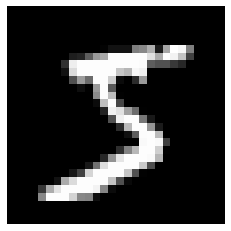

In [7]:
plt.axis("off")
plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [8]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True)

In [9]:
train_features, train_labels = next(iter(train_dataloader))

In [10]:
train_features.shape

torch.Size([16, 1, 28, 28])

In [11]:
train_labels.shape

torch.Size([16])

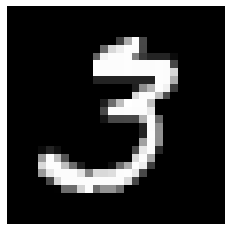

In [12]:
plt.axis("off")
plt.imshow(train_features[0].squeeze(), cmap="gray")
plt.show()

## Полносвязный слой

In [13]:
x = train_features.flatten(start_dim=1)

In [14]:
input_size = 28 * 28
hidden_size = 256
output_size = 10

In [15]:
x.shape

torch.Size([16, 784])

In [16]:
w1 = torch.zeros((hidden_size, input_size), requires_grad=True)
b1 = torch.zeros(hidden_size, requires_grad=True)

## Инициализация

Инициализация в нейросетевых делах [страшно важна](https://ai.facebook.com/blog/understanding-the-generalization-of-lottery-tickets-in-neural-networks/). В пайторче есть некоторый зоопарк методов для инициализации, и по умолчанию каждый модуль использует какой-то из них, но иногда есть смысл задать способ инициализации явно.

In [17]:
init.xavier_uniform_(w1)
pass

Масса других инициализирующих функций есть здесь: https://pytorch.org/docs/master/nn.html#torch-nn-init.

In [18]:
w1.data.uniform_(-1 / math.sqrt(input_size), 1 / math.sqrt(input_size))
b1.data.uniform_(-1 / math.sqrt(hidden_size), 1 / math.sqrt(hidden_size))
pass

In [19]:
h1 = x.matmul(w1.T) + b1 

In [20]:
h1

tensor([[-0.1498,  0.0126, -0.2601,  ...,  0.2735, -0.0432, -0.1098],
        [ 0.2317, -0.1721, -0.0790,  ...,  0.3613,  0.2067, -0.0067],
        [-0.0140,  0.0532, -0.2776,  ...,  0.2900,  0.1884,  0.3241],
        ...,
        [ 0.1785, -0.2169, -0.1848,  ...,  0.0957,  0.0323,  0.0833],
        [-0.3999,  0.0810, -0.1840,  ...,  0.0668,  0.2701,  0.0233],
        [ 0.1427, -0.1068, -0.1650,  ...,  0.2970, -0.0306,  0.2832]],
       grad_fn=<AddBackward0>)

<img width=450 src="https://pytorch.org/docs/stable/_images/Tanh.png"/>

$$\tanh(x)=\frac{e^x-e^{-x}}{e^x + e^{-x}}$$

In [21]:
h1 = h1.tanh()

In [22]:
w2 = torch.zeros((output_size, hidden_size), requires_grad=True)
b2 = torch.zeros(output_size, requires_grad=True)

w2.data.uniform_(-1 / math.sqrt(hidden_size), 1 / math.sqrt(hidden_size)) 
b2.data.uniform_(-1 / math.sqrt(output_size), 1 / math.sqrt(output_size))
pass

In [23]:
out = h1.matmul(w2.T) + b2

## Softmax

![image](https://d2mk45aasx86xg.cloudfront.net/Mathematical_representation_of_the_softmax_function_48d4f5e786.webp)

In [24]:
y_prob = out.softmax(1)
y_prob

tensor([[0.1469, 0.0840, 0.0944, 0.1164, 0.0900, 0.0871, 0.0922, 0.1260, 0.0677,
         0.0953],
        [0.1560, 0.0796, 0.0979, 0.1190, 0.0827, 0.0978, 0.0924, 0.1048, 0.0755,
         0.0944],
        [0.1403, 0.0876, 0.1064, 0.0985, 0.0918, 0.0950, 0.0889, 0.1087, 0.0774,
         0.1054],
        [0.1516, 0.0871, 0.0974, 0.1052, 0.0812, 0.1068, 0.0827, 0.1031, 0.0852,
         0.0998],
        [0.1386, 0.0832, 0.0873, 0.1197, 0.0957, 0.0995, 0.0892, 0.1064, 0.0828,
         0.0975],
        [0.1286, 0.0900, 0.0964, 0.1328, 0.0839, 0.0854, 0.0937, 0.1192, 0.0723,
         0.0977],
        [0.1350, 0.0817, 0.1057, 0.1179, 0.0983, 0.0974, 0.0856, 0.1077, 0.0807,
         0.0901],
        [0.1483, 0.0870, 0.0874, 0.1288, 0.0830, 0.1048, 0.0849, 0.1050, 0.0779,
         0.0927],
        [0.1390, 0.0856, 0.1044, 0.1101, 0.0745, 0.1021, 0.0841, 0.1180, 0.0739,
         0.1083],
        [0.1276, 0.1030, 0.0808, 0.1261, 0.1071, 0.0757, 0.0851, 0.1127, 0.0781,
         0.1037],
        [0

## Функция потерь

In [25]:
def loss_fn(y_prob, y):
    loss = -y_prob[range(len(y)), y].log()
    return loss.mean()

In [26]:
loss_fn(y_prob, train_labels)

tensor(2.2952, grad_fn=<MeanBackward0>)

In [27]:
def forward_pass(x):
    h1 = x.matmul(w1.T) + b1 
    
    h1 = torch.tanh(h1)
    
    out = h1.matmul(w2.T) + b2
    return out

In [28]:
learning_rate = 0.01

for i,data in enumerate(train_dataloader):
    x, labels = data
    x = x.flatten(start_dim=1)
    
    w1.grad = None
    b1.grad = None
    
    w2.grad = None
    b2.grad = None
    
    out = forward_pass(x)
    y_prob = torch.softmax(out, 1)
        
    loss = loss_fn(y_prob, labels)
    
    loss.backward()
    
    if i % 100 == 0:
        print(f"loss = {loss.detach()}")
            
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b1 -= learning_rate * b1.grad
        
        w2 -= learning_rate * w2.grad
        b2 -= learning_rate * b2.grad
        


loss = 2.1954147815704346
loss = 1.872170329093933
loss = 1.761670708656311
loss = 1.2624942064285278
loss = 0.8048684000968933
loss = 0.8668468594551086
loss = 0.5387331247329712
loss = 0.7654440999031067
loss = 0.5475489497184753
loss = 0.7212368845939636
loss = 0.3201481103897095
loss = 0.5632190108299255
loss = 0.38183677196502686
loss = 0.5373282432556152
loss = 0.555768609046936
loss = 0.4953734576702118
loss = 0.29705357551574707
loss = 0.5187391042709351
loss = 0.38077330589294434
loss = 0.45280152559280396
loss = 0.2424268275499344
loss = 0.60570228099823
loss = 0.42436549067497253
loss = 0.2851907014846802
loss = 0.21959273517131805
loss = 0.20681318640708923
loss = 0.2967592775821686
loss = 0.18367648124694824
loss = 0.32121607661247253
loss = 0.34974783658981323
loss = 0.6866682767868042
loss = 0.46610409021377563
loss = 0.24421271681785583
loss = 0.43527713418006897
loss = 0.6601920127868652
loss = 0.15803495049476624
loss = 0.7819257974624634
loss = 0.35352644324302673


## Модули

Модули упрощают и помогают упорядочивать работу с функциями,входами, выходами, объединяя их в единые удобные для более высокоуровневого использования объекты.

### Пример
Линейный **слой** -- слой прямого распространения

In [29]:
l1 = nn.Linear(input_size, hidden_size)
l2 = nn.Linear(hidden_size, output_size)

In [30]:
def forward_pass(x):
    h1 = l1(x)
    h1 = torch.tanh(h1)    
    out = l2(h1)
    return out

In [31]:
print(list(l1.parameters()))

[Parameter containing:
tensor([[-0.0268,  0.0214, -0.0010,  ..., -0.0019,  0.0120,  0.0165],
        [ 0.0074,  0.0221, -0.0272,  ..., -0.0076,  0.0110, -0.0177],
        [ 0.0041,  0.0023, -0.0224,  ..., -0.0064,  0.0254, -0.0340],
        ...,
        [-0.0050,  0.0166, -0.0226,  ...,  0.0318,  0.0298, -0.0211],
        [ 0.0191,  0.0327,  0.0257,  ..., -0.0274,  0.0264, -0.0053],
        [-0.0330,  0.0349,  0.0215,  ...,  0.0346, -0.0124,  0.0201]],
       requires_grad=True), Parameter containing:
tensor([ 1.9756e-02,  1.1577e-02, -7.9127e-03, -3.0742e-02, -2.8755e-02,
        -4.2968e-04,  3.3822e-02,  1.2749e-02, -3.3324e-02, -1.1631e-02,
        -2.6836e-02, -7.8941e-03,  3.9885e-03, -1.1529e-02, -1.7193e-02,
         2.0939e-02, -1.2173e-02,  1.1360e-02,  2.3086e-02,  3.3804e-02,
         3.5047e-02,  3.0837e-02,  6.3882e-03, -1.7570e-02,  3.4225e-02,
        -1.3687e-02, -1.7973e-02, -3.4288e-02,  3.2516e-02,  1.8577e-02,
         3.5451e-03, -2.8374e-02, -4.5274e-03,  3.0671e

In [32]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        h1 = l1(x)
        h1 = torch.tanh(h1)    
        out = l2(h1)
        return out
    
net = Net()
net


Net(
  (l1): Linear(in_features=784, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=10, bias=True)
)

In [33]:
tanh = nn.Tanh()
tanh

Tanh()

In [34]:
sequential = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.Tanh(), 
    nn.Linear(hidden_size, output_size)    
)

sequential

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): Tanh()
  (2): Linear(in_features=256, out_features=10, bias=True)
)

In [35]:
sequential(x)

tensor([[ 0.1247, -0.1018, -0.1066, -0.0587, -0.0056,  0.1454, -0.0803,  0.1204,
          0.0289,  0.0064],
        [ 0.0325, -0.0701,  0.1296,  0.0354, -0.0459, -0.0402, -0.1289, -0.1200,
          0.1259, -0.0832],
        [ 0.1081, -0.0710, -0.0714,  0.0054, -0.0354, -0.0807, -0.2196, -0.0142,
          0.0364,  0.1085],
        [ 0.0836, -0.1339,  0.0327, -0.0647,  0.0075,  0.0843, -0.1749, -0.0762,
          0.1156,  0.0221],
        [ 0.1157, -0.0044,  0.0772, -0.1804, -0.0387,  0.1164, -0.2649,  0.1050,
         -0.1028, -0.0904],
        [ 0.0331, -0.1367,  0.2722, -0.0036,  0.0838,  0.1045,  0.0879, -0.0688,
         -0.0463, -0.0051],
        [ 0.2537, -0.1175, -0.0025,  0.0048, -0.1718,  0.0863, -0.3249,  0.0398,
          0.0678, -0.0709],
        [ 0.1936, -0.0362, -0.0796,  0.0620, -0.0289,  0.0358, -0.1277,  0.0056,
          0.0640,  0.0641],
        [ 0.2836,  0.0197,  0.0740,  0.0064, -0.0007, -0.0413, -0.1946,  0.0321,
          0.0635, -0.0977],
        [ 0.2295, -

Собрали модель и увидели, что pytorch умеет такое красиво распечатывать -- как и более сложные конструкции. 

Но обычно сети за пределами простой цепочки стандартных действий на практике задают в таком духе:

Невязка ("лосс") создаётся отдельно.

In [36]:
cross_entropy = torch.nn.CrossEntropyLoss()
cross_entropy

CrossEntropyLoss()

## Порисуем

Какой у нас получится вычислительный граф, точнее, как с ним будет работать autograd.

In [37]:
! pip install -q torchviz

Для начала посмотрим на первую модельку

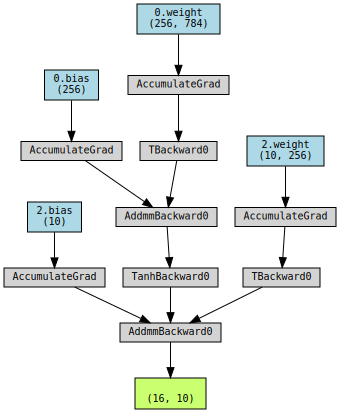

In [38]:
from torchviz import make_dot

make_dot(sequential(x), params=dict(sequential.named_parameters()))

А потом на `Net`

In [39]:
# make_dot(net(x), params=dict(net.named_parameters()))

---
# Модули: как это работает

А теперь давайте разберёмся, что же тут всё-таки происходит.

Module -- это класс, от которого нужно наследовать все нейронные сети. Он сделан потому, что у нейросетевых моделей много общего, и часть накладной нагрузки на программиста можно снять.


In [40]:
from torch.nn import Module
from torch.nn import Parameter

In [41]:
class Power(Module):

    # TorchScript-овый прикол
    __constants__ = ['exponent']

    def __init__(self, exponent=3):
        super().__init__()
        self.exponent = exponent

    def forward(self, input):
        return torch.pow(input, self.exponent)

    def extra_repr(self):
        return f'exponent\={self.exponent}'

> Torch Script is a way to create serializable and optimizable models from PyTorch code. Any code written in Torch Script can be saved from your Python process and loaded in a process where there is no Python dependency.

The above quote is actually true both of scripting and tracing. So

1. You gain the ability to serialize your models and later **run them outside of Python, via LibTorch, a C++ native module**. This allows you to embed your DL models in various production environments like mobile or IoT. There is an official guide on exporting models to C++ here.

2. PyTorch can compile your jit-able modules rather than running them as an interpreter, allowing for various optimizations and improving performance, both during training and inference. This is equally helpful for development and production.


In [42]:
power = Power(3)

In [43]:
power

Power(exponent\=3)

In [44]:
power(torch.Tensor([2]))

tensor([8.])

In [45]:
x = torch.tensor(10.0, requires_grad=True)

In [46]:
power(x).backward()
x.grad  

tensor(300.)

## Параметры

У некоторых моделей внутри могут быть "состояния" -- например, обучаемые веса.

In [47]:
linear = nn.Linear(6, 8)

In [48]:
list(linear.parameters())

[Parameter containing:
 tensor([[-0.2192,  0.2153, -0.0056,  0.2199,  0.0530, -0.2199],
         [-0.1422,  0.2096,  0.0290,  0.0212,  0.3742, -0.0771],
         [ 0.2743, -0.3389, -0.3385,  0.1150,  0.0619,  0.4009],
         [-0.0323, -0.2767,  0.1282, -0.3378, -0.1506,  0.0136],
         [-0.3782,  0.2697, -0.2809, -0.1716, -0.1619, -0.2640],
         [ 0.3626,  0.2327, -0.2951,  0.2447, -0.0399, -0.2561],
         [ 0.2425, -0.3782, -0.1001, -0.3398,  0.3744,  0.0978],
         [ 0.0897, -0.2195, -0.2919, -0.3156, -0.3921, -0.2114]],
        requires_grad=True), Parameter containing:
 tensor([-0.2795,  0.0884, -0.1439, -0.2438, -0.0791, -0.3904, -0.0678,  0.2625],
        requires_grad=True)]

Вы уже догадались, что это за два тензора: матрица весов...

In [49]:
linear.weight

Parameter containing:
tensor([[-0.2192,  0.2153, -0.0056,  0.2199,  0.0530, -0.2199],
        [-0.1422,  0.2096,  0.0290,  0.0212,  0.3742, -0.0771],
        [ 0.2743, -0.3389, -0.3385,  0.1150,  0.0619,  0.4009],
        [-0.0323, -0.2767,  0.1282, -0.3378, -0.1506,  0.0136],
        [-0.3782,  0.2697, -0.2809, -0.1716, -0.1619, -0.2640],
        [ 0.3626,  0.2327, -0.2951,  0.2447, -0.0399, -0.2561],
        [ 0.2425, -0.3782, -0.1001, -0.3398,  0.3744,  0.0978],
        [ 0.0897, -0.2195, -0.2919, -0.3156, -0.3921, -0.2114]],
       requires_grad=True)

...и свободные члены.

In [50]:
linear.bias

Parameter containing:
tensor([-0.2795,  0.0884, -0.1439, -0.2438, -0.0791, -0.3904, -0.0678,  0.2625],
       requires_grad=True)

А у других штучек в нашем случае обучаемых параметров нет

In [51]:
list(tanh.parameters())

[]

Иногда бывает нужно посчитать, сколько в вашей модели всего параметров (например, для сравнения с конкурирующей моделью). Можно особо не мучиться, а написать примерно такой подсчитывающий однострочник.

In [52]:
list(map(lambda x: x.shape, list(sequential.parameters())))

[torch.Size([256, 784]),
 torch.Size([256]),
 torch.Size([10, 256]),
 torch.Size([10])]

In [53]:
list(map(lambda x: x.shape, list(net.parameters())))

[torch.Size([256, 784]),
 torch.Size([256]),
 torch.Size([10, 256]),
 torch.Size([10])]

In [54]:
list(map(lambda x: x.requires_grad, list(net.parameters())))

[True, True, True, True]

## Оптимизаторы

В pytorch встроено несколько популярных оптимизационных алгоритмов.

In [55]:
import torch.optim as optim

In [56]:
x = torch.tensor([1.0], requires_grad = True)

"Оптимизатору" в явном виде передаются параметры, которые он должен обновлять

In [57]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()        
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        h1 = self.l1(x)
        h1 = torch.tanh(h1)    
        out = self.l2(h1)
        return out

net = Net()

In [58]:
x, labels = data
x = x.flatten(start_dim=1)

x.shape

torch.Size([16, 784])

In [59]:
net(x).shape

torch.Size([16, 10])

In [60]:
cross_entropy = torch.nn.CrossEntropyLoss()

In [61]:
sgd = optim.SGD(params=net.parameters(), lr=0.01) 

In [62]:
def train_epoch():
    for i, data in enumerate(train_dataloader):
        x, labels = data
        
        
        sgd.zero_grad()
        
        x = x.flatten(start_dim=1)
        out = net(x)
            
        loss = cross_entropy(out, labels)
        loss.backward()
        
        sgd.step()
        
        if i % 100 == 0:
            print(f"loss = {loss.detach()}")
            
        

In [63]:
def test_epoch():
    losses = []
    with torch.no_grad():
        for data in test_dataloader:
            x, labels = data
            x = x.flatten(start_dim=1)
        
            out = net(x)
        
            loss = cross_entropy(out, labels)
            losses.append(loss)
            
    return np.mean(losses)
            

In [64]:
test_epoch()

2.2879019

In [65]:
train_epoch()

loss = 2.296444892883301
loss = 1.773205041885376
loss = 1.560579538345337
loss = 1.1967637538909912
loss = 0.824689507484436
loss = 0.7411928176879883
loss = 0.5345644354820251
loss = 0.9647818803787231
loss = 0.469192773103714
loss = 0.8296827673912048
loss = 0.6331417560577393
loss = 0.42413029074668884
loss = 0.3486808240413666
loss = 0.7512129545211792
loss = 0.47918233275413513
loss = 0.3357984125614166
loss = 0.5692330598831177
loss = 0.3212122619152069
loss = 0.33591434359550476
loss = 0.3773263394832611
loss = 0.34930217266082764
loss = 1.054093599319458
loss = 0.33575162291526794
loss = 0.38026973605155945
loss = 0.9268264770507812
loss = 0.5696569085121155
loss = 0.15594306588172913
loss = 0.14815586805343628
loss = 0.26653409004211426
loss = 0.290889710187912
loss = 0.3727155029773712
loss = 0.21880526840686798
loss = 0.30263960361480713
loss = 0.48563575744628906
loss = 0.6453876495361328
loss = 0.2848740816116333
loss = 1.1001555919647217
loss = 0.1880919188261032


In [66]:
test_epoch()

0.33518916